##direct

In [3]:
import cv2
import matplotlib.pyplot as plt

In [20]:
img1 = cv2.imread('./train.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./query.webp', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()

In [21]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [22]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

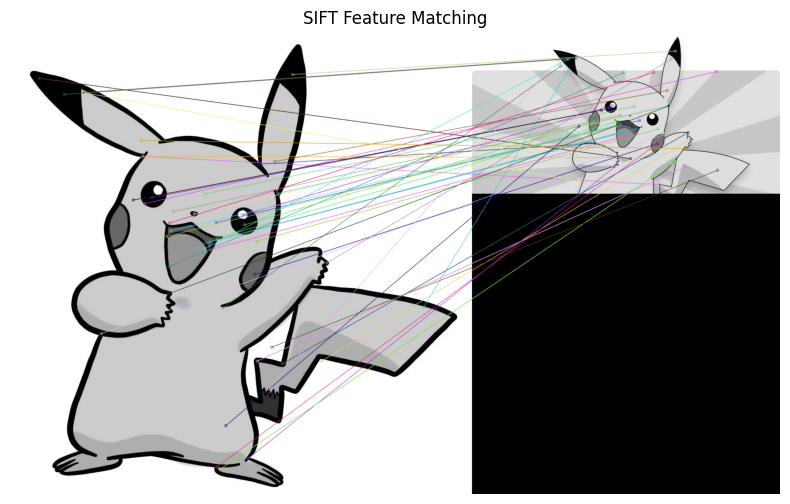

In [23]:
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title('SIFT Feature Matching')
plt.axis('off')
plt.show()

##new

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
img = cv2.imread('./train.jpg', cv2.IMREAD_GRAYSCALE)

In [34]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 30
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

In [35]:
detector = cv2.SimpleBlobDetector_create(params)
keypoints_blob = detector.detect(img)
blob_img = cv2.drawKeypoints(img, keypoints_blob, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [36]:
(h, w) = img.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
scaled_img = cv2.resize(img, None, fx=0.5, fy=0.5)

In [37]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(rotated_img, None)
kp3, des3 = sift.detectAndCompute(scaled_img, None)

In [38]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches_rotated = bf.match(des1, des2)
matches_scaled = bf.match(des1, des3)

matches_rotated = sorted(matches_rotated, key=lambda x: x.distance)
matches_scaled = sorted(matches_scaled, key=lambda x: x.distance)

img_matches_rotated = cv2.drawMatches(img, kp1, rotated_img, kp2, matches_rotated[:200], None, flags=2)
img_matches_scaled = cv2.drawMatches(img, kp1, scaled_img, kp3, matches_scaled[:200], None, flags=2)

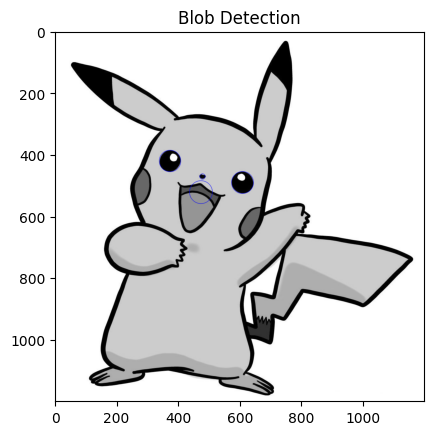

In [39]:
plt.imshow(blob_img, cmap='gray')
plt.title("Blob Detection")
plt.show()

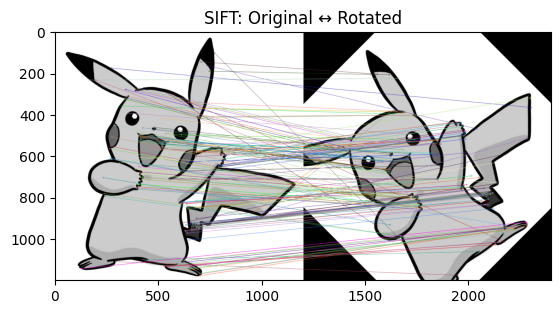

In [40]:
plt.imshow(img_matches_rotated)
plt.title("SIFT: Original ↔ Rotated")
plt.show()

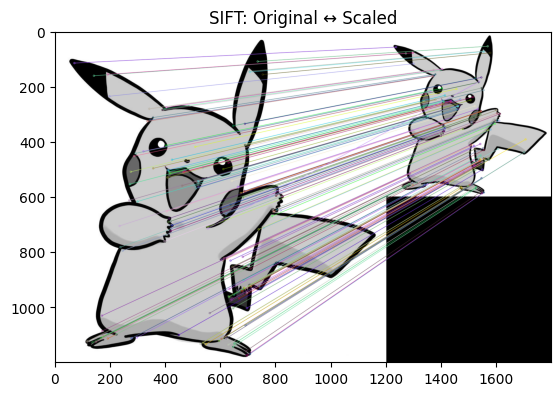

In [41]:
plt.imshow(img_matches_scaled)
plt.title("SIFT: Original ↔ Scaled")
plt.show()